<a href="https://colab.research.google.com/github/mia19reynolds/PortfolioProject/blob/main/FInalProjectPOC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# POC Building age, gender, ethnicity for Derbyshire

This POC demonstrates the generation of a small synthetic dataset of secondary school studnets, it uses distriutions that reflect real demographics within Derbyshire, England. The distributions seen in this notebook have been calculated from real, publicly available datasets published by the Department of Education. For the purpose of this project, data has been used from 2023/24 wehre possible and only for secondary school ages.

Demographic attributes were sampled from these datasets (gender, age, ethnicity), after this FSM elegibility was applied by conditioning both the student local area (Derbyshire) and ethnicity.

## Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

## Draw Distributions from Real Data

### Gender and Age distributions

In [ ]:
# Load the gender and age file
gender_age_df = pd.read_csv('/content/drive/MyDrive/pupildata/spc_pupils_age_and_sex_.csv')

gender_age_df.head()

,time_period,time_identifier,geographic_level,country_code,country_name,region_name,region_code,old_la_code,la_name,new_la_code,phase_type_grouping,sex,age,full_time,part_time,headcount,fte
0,201516,Academic year,Local authority,E92000001,England,East Midlands,E12000004,830.0,Derbyshire,E10000007,Independent school,Female,0,0,5,5,2.5
1,201516,Academic year,Local authority,E92000001,England,East Midlands,E12000004,830.0,Derbyshire,E10000007,Independent school,Female,1,5,7,12,8.5
2,201516,Academic year,Local authority,E92000001,England,East Midlands,E12000004,830.0,Derbyshire,E10000007,Independent school,Female,10,125,0,125,125.0
3,201516,Academic year,Local authority,E92000001,England,East Midlands,E12000004,830.0,Derbyshire,E10000007,Independent school,Female,11,135,0,135,135.0
4,201516,Academic year,Local authority,E92000001,England,East Midlands,E12000004,830.0,Derbyshire,E10000007,Independent school,Female,12,130,1,131,130.5


In [ ]:
# Load CSV in chunks
chunks = pd.read_csv('/content/drive/MyDrive/pupildata/spc_pupils_age_and_sex_.csv', chunksize=100000, low_memory=False)
filtered_chunks = []

for chunk in chunks:
    chunk['time_period'] = chunk['time_period'].astype(str)
    chunk['age'] = pd.to_numeric(chunk['age'], errors='coerce')

    # Drop NaNs
    chunk = chunk.dropna(subset=['age'])

    # Filter to 2023/24 academic year
    chunk = chunk[chunk['time_period'] == '202324']

    # Filter to Derbyshire only
    chunk = chunk[chunk['la_name'] == 'Derbyshire']

    # Filter secondary ages
    chunk = chunk[(chunk['age'] >= 11) & (chunk['age'] <= 16)]

    # Exclude nursery and primary
    excluded_phases = ['State-funded nursery', 'State-funded primary']
    chunk = chunk[~chunk['phase_type_grouping'].isin(excluded_phases)]

    filtered_chunks.append(chunk)

# Final secondary school dataset for Derbyshire
secondary_df = pd.concat(filtered_chunks, ignore_index=True)

print("Filtered secondary school dataset shape:", secondary_df.shape)
secondary_df.head()


Filtered secondary school dataset shape: (90, 17)


,time_period,time_identifier,geographic_level,country_code,country_name,region_name,region_code,old_la_code,la_name,new_la_code,phase_type_grouping,sex,age,full_time,part_time,headcount,fte
0,202324,Academic year,Local authority,E92000001,England,East Midlands,E12000004,830.0,Derbyshire,E10000007,Independent school,Female,11.0,113,0,113,113.0
1,202324,Academic year,Local authority,E92000001,England,East Midlands,E12000004,830.0,Derbyshire,E10000007,Independent school,Female,12.0,151,0,151,151.0
2,202324,Academic year,Local authority,E92000001,England,East Midlands,E12000004,830.0,Derbyshire,E10000007,Independent school,Female,13.0,147,0,147,147.0
3,202324,Academic year,Local authority,E92000001,England,East Midlands,E12000004,830.0,Derbyshire,E10000007,Independent school,Female,14.0,178,0,178,178.0
4,202324,Academic year,Local authority,E92000001,England,East Midlands,E12000004,830.0,Derbyshire,E10000007,Independent school,Female,15.0,186,0,186,186.0


In [ ]:
gender_df = secondary_df[secondary_df['sex'].isin(['Male', 'Female'])]

gender_headcount = gender_df.groupby('sex')['headcount'].sum().reset_index()

print("Headcount by Gender:")
print(gender_headcount)

Headcount by Gender:
      sex  headcount
0  Female      45833
1    Male      48183


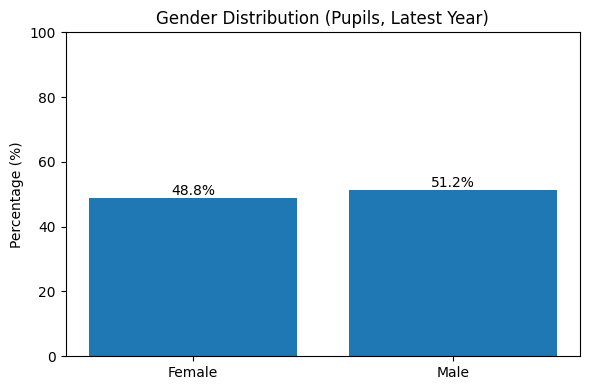

In [ ]:
# Filter Male and Female rows
gender_df = secondary_df[secondary_df['sex'].isin(['Male', 'Female'])]

# Group and calculate percentages
gender_dist = gender_df.groupby('sex')['headcount'].sum().reset_index()
gender_dist['percent'] = gender_dist['headcount'] / gender_dist['headcount'].sum() * 100

# Plot
plt.figure(figsize=(6, 4))
plt.bar(gender_dist['sex'], gender_dist['percent'])
plt.title('Gender Distribution (Pupils, Latest Year)')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)
for idx, row in gender_dist.iterrows():
    plt.text(idx, row['percent'] + 1, f"{row['percent']:.1f}%", ha='center')
plt.tight_layout()
plt.show()


In [ ]:
# Filter
secondary_df = secondary_df[secondary_df['sex'].isin(['Male', 'Female'])]

# Real Gender distribution
gender_distribution_real = secondary_df.groupby('sex')['headcount'].sum()
gender_distribution_real = gender_distribution_real / gender_distribution_real.sum()

# Real Age distribution
age_distribution_real = secondary_df.groupby('age')['headcount'].sum()
age_distribution_real = age_distribution_real / age_distribution_real.sum()

# Display results
print("Real Gender Distribution (Proportions):")
print(gender_distribution_real)

print("Real Age Distribution (Proportions):")
print(age_distribution_real)


Real Gender Distribution (Proportions):
sex
Female    0.487502
Male      0.512498
Name: headcount, dtype: float64
Real Age Distribution (Proportions):
age
11.0    0.190212
12.0    0.192329
13.0    0.187787
14.0    0.181224
15.0    0.185181
16.0    0.063266
Name: headcount, dtype: float64


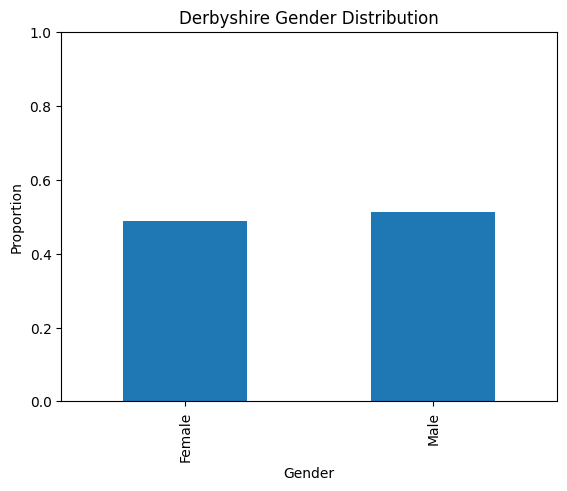

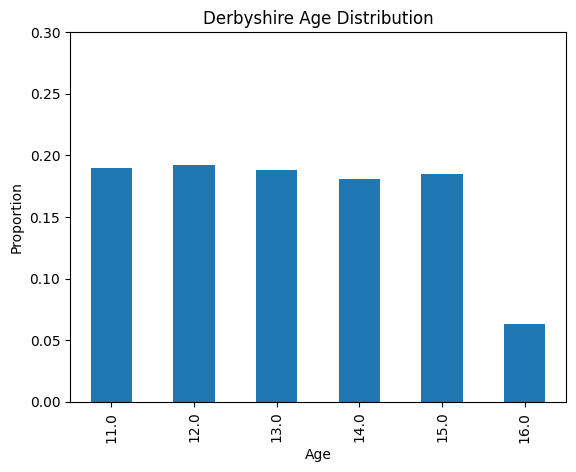

In [ ]:
# Gender Plot
gender_distribution_real.plot(kind='bar', title='Derbyshire Gender Distribution')
plt.ylabel('Proportion')
plt.xlabel('Gender')
plt.ylim(0, 1)
plt.show()

# Age Plot
age_distribution_real.plot(kind='bar', title='Derbyshire Age Distribution')
plt.ylabel('Proportion')
plt.xlabel('Age')
plt.ylim(0, 0.3)
plt.show()

### `Ethnicity Distibutions`

In [ ]:
# Load the ethnicity dataset
ethnicity_df = pd.read_csv('/content/drive/MyDrive/pupildata/spc_pupils_ethnicity_and_language_.csv')

# Filter to Derbyshire only
ethnicity_df = ethnicity_df[ethnicity_df['la_name'] == 'Derbyshire']

# Preview
print("Ethnicity data shape (Derbyshire only):", ethnicity_df.shape)
ethnicity_df.head()


Ethnicity data shape (Derbyshire only): (1242, 15)


,time_period,time_identifier,geographic_level,country_code,country_name,region_name,region_code,old_la_code,la_name,new_la_code,phase_type_grouping,ethnicity_minor,language,headcount,percent_of_pupils
0,202324,Academic year,Local authority,E92000001,England,East Midlands,E12000004,830.0,Derbyshire,E10000007,State-funded AP school,Any other ethnic group,Total,1,0.280899
1,202324,Academic year,Local authority,E92000001,England,East Midlands,E12000004,830.0,Derbyshire,E10000007,State-funded AP school,Asian - Any other Asian background,Total,2,0.561798
2,202324,Academic year,Local authority,E92000001,England,East Midlands,E12000004,830.0,Derbyshire,E10000007,State-funded AP school,Asian - Bangladeshi,Total,0,0.000000
3,202324,Academic year,Local authority,E92000001,England,East Midlands,E12000004,830.0,Derbyshire,E10000007,State-funded AP school,Asian - Chinese,Total,0,0.000000
4,202324,Academic year,Local authority,E92000001,England,East Midlands,E12000004,830.0,Derbyshire,E10000007,State-funded AP school,Asian - Indian,Total,0,0.000000


In [ ]:
# Filter
ethnicity_df = ethnicity_df[ethnicity_df['ethnicity_minor'] != 'Total']

# Group and calculate real distribution
ethnicity_distribution_real = ethnicity_df.groupby('ethnicity_minor')['headcount'].sum()
ethnicity_distribution_real = ethnicity_distribution_real / ethnicity_distribution_real.sum()

# Display
print("Fixed Derbyshire Ethnicity Distribution:")
print(ethnicity_distribution_real)


Fixed Derbyshire Ethnicity Distribution:
ethnicity_minor
Any other ethnic group                 0.002751
Asian - Any other Asian background     0.002991
Asian - Bangladeshi                    0.000306
Asian - Chinese                        0.002989
Asian - Indian                         0.006543
Asian - Pakistani                      0.002510
Black - Any other Black background     0.000913
Black - Black African                  0.003366
Black - Black Caribbean                0.000752
Mixed - Any other Mixed background     0.008011
Mixed - White and Asian                0.008665
Mixed - White and Black African        0.003980
Mixed - White and Black Caribbean      0.009813
Unclassified                           0.010101
White - Any other White background     0.021675
White - Gypsy/Roma                     0.000714
White - Irish                          0.001502
White - Traveller of Irish heritage    0.000511
White - White British                  0.911907
Name: headcount, dtype: float64

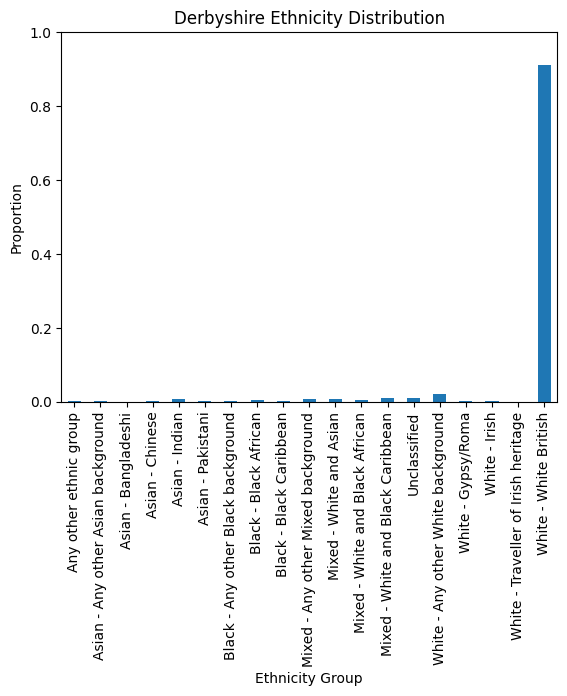

In [ ]:
ethnicity_distribution_real.plot(kind='bar', title='Derbyshire Ethnicity Distribution')
plt.ylabel('Proportion')
plt.xlabel('Ethnicity Group')
plt.ylim(0, 1)
plt.show()

### FSM Distribution (by location and ethnicity)

In [ ]:
# Load the FSM by Ethnicity dataset
fsm_ethnicity_df = pd.read_csv('/content/drive/MyDrive/pupildata/spc_pupils_fsm_ethnicity_yrgp.csv')

# View the first few rows
fsm_ethnicity_df.head()


,time_period,time_identifier,geographic_level,country_code,country_name,region_name,region_code,old_la_code,la_name,new_la_code,phase_type_grouping,characteristic_group,characteristic,fsm_eligibility,number_of_pupils,denominator,percent_of_pupils
0,202324,Academic year,Local authority,E92000001,England,East Midlands,E12000004,830.0,Derbyshire,E10000007,State-funded AP school,Ethnicity Minor,Any other ethnic group,Known to be eligible for free school meals,1,1,100.00
1,202324,Academic year,Local authority,E92000001,England,East Midlands,E12000004,830.0,Derbyshire,E10000007,State-funded AP school,Ethnicity Minor,Asian - Any other Asian background,Known to be eligible for free school meals,2,2,100.00
2,202324,Academic year,Local authority,E92000001,England,East Midlands,E12000004,830.0,Derbyshire,E10000007,State-funded AP school,Ethnicity Minor,Black - Black Caribbean,Not known to be eligible for free school meals,1,1,100.00
3,202324,Academic year,Local authority,E92000001,England,East Midlands,E12000004,830.0,Derbyshire,E10000007,State-funded AP school,Ethnicity Minor,Mixed - Any other Mixed background,Known to be eligible for free school meals,4,6,66.67
4,202324,Academic year,Local authority,E92000001,England,East Midlands,E12000004,830.0,Derbyshire,E10000007,State-funded AP school,Ethnicity Minor,Mixed - Any other Mixed background,Not known to be eligible for free school meals,2,6,33.33


In [ ]:
# Load the real FSM dataset
fsm_overall_df = pd.read_csv('/content/drive/MyDrive/pupildata/spc_pupils_fsm.csv')

# Filter to Derbyshire only
fsm_overall_derbyshire = fsm_overall_df[
    (fsm_overall_df['la_name'] == 'Derbyshire') &
    (fsm_overall_df['phase_type_grouping'] == 'State-funded secondary') &
    (fsm_overall_df['time_period'].astype(str) == '202324')
]

# View the unique FSM values
print("FSM column unique values:")
print(fsm_overall_derbyshire['fsm'].unique())

# Filter to rows students "known to be eligible"
fsm_eligible_rows = fsm_overall_derbyshire[
    fsm_overall_derbyshire['fsm'].str.contains('known to be eligible', case=False, na=False)
]

# Calculate FSM eligibility rate
fsm_eligible_percentage = fsm_eligible_rows['percent_of_pupils'].mean()

print(f"Real FSM eligibility rate for Derbyshire secondary schools (2023/24): {fsm_eligible_percentage:.2f}%")


FSM column unique values:
['FSM eligible pupils taking free school meals'
 'infants taken a free school meal on census day'
 'known to be eligible for free school meals'
 'known to be eligible for free school meals (used for FSM in Performance Tables)'
 'number of pupils (used for FSM in Performance Tables)' 'Total']
Real FSM eligibility rate for Derbyshire secondary schools (2023/24): 25.99%


In [ ]:
# Load FSM dataset
fsm_ethnicity_df = pd.read_csv('/content/drive/MyDrive/pupildata/spc_pupils_fsm_ethnicity_yrgp.csv')

# Derbyshire only
fsm_ethnicity_df = fsm_ethnicity_df[fsm_ethnicity_df['la_name'] == 'Derbyshire']

# 2023/24 academic year
fsm_ethnicity_df['time_period'] = fsm_ethnicity_df['time_period'].astype(str)
fsm_ethnicity_df = fsm_ethnicity_df[fsm_ethnicity_df['time_period'] == '202324']

# Ethnicity characteristics only
fsm_ethnicity_df = fsm_ethnicity_df[fsm_ethnicity_df['characteristic_group'] == 'Ethnicity Minor']

# FSM Eligible only
# Only rows where students are known to be eligible for FSM
fsm_ethnicity_df = fsm_ethnicity_df[fsm_ethnicity_df['fsm_eligibility'].str.contains('Known to be eligible')]

print("Filtered dataset shape:", fsm_ethnicity_df.shape)
fsm_ethnicity_df.head()


Filtered dataset shape: (81, 17)


<ipython-input-31-93222c223bcc>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fsm_ethnicity_df['time_period'] = fsm_ethnicity_df['time_period'].astype(str)


,time_period,time_identifier,geographic_level,country_code,country_name,region_name,region_code,old_la_code,la_name,new_la_code,phase_type_grouping,characteristic_group,characteristic,fsm_eligibility,number_of_pupils,denominator,percent_of_pupils
0,202324,Academic year,Local authority,E92000001,England,East Midlands,E12000004,830.0,Derbyshire,E10000007,State-funded AP school,Ethnicity Minor,Any other ethnic group,Known to be eligible for free school meals,1,1,100.00
1,202324,Academic year,Local authority,E92000001,England,East Midlands,E12000004,830.0,Derbyshire,E10000007,State-funded AP school,Ethnicity Minor,Asian - Any other Asian background,Known to be eligible for free school meals,2,2,100.00
3,202324,Academic year,Local authority,E92000001,England,East Midlands,E12000004,830.0,Derbyshire,E10000007,State-funded AP school,Ethnicity Minor,Mixed - Any other Mixed background,Known to be eligible for free school meals,4,6,66.67
5,202324,Academic year,Local authority,E92000001,England,East Midlands,E12000004,830.0,Derbyshire,E10000007,State-funded AP school,Ethnicity Minor,Mixed - White and Asian,Known to be eligible for free school meals,2,3,66.67
7,202324,Academic year,Local authority,E92000001,England,East Midlands,E12000004,830.0,Derbyshire,E10000007,State-funded AP school,Ethnicity Minor,Mixed - White and Black African,Known to be eligible for free school meals,1,1,100.00


In [ ]:
# Group by Ethnicity and get mean FSM percentage
fsm_by_ethnicity = fsm_ethnicity_df.groupby('characteristic')['percent_of_pupils'].mean()

# Build the (Area, Ethnicity)
fsm_probs_by_area_ethnicity = {('Derbyshire', ethnicity): percent/100 for ethnicity, percent in fsm_by_ethnicity.items()}

print("Real FSM probabilities by (Area, Ethnicity):")
for k, v in fsm_probs_by_area_ethnicity.items():
    print(k, ":", round(v*100, 1), "%")

Real FSM probabilities by (Area, Ethnicity):
('Derbyshire', 'Any other ethnic group') : 47.9 %
('Derbyshire', 'Asian - Any other Asian background') : 37.7 %
('Derbyshire', 'Asian - Bangaladeshi') : 28.6 %
('Derbyshire', 'Asian - Chinese') : 10.5 %
('Derbyshire', 'Asian - Indian') : 9.8 %
('Derbyshire', 'Asian - Pakistani') : 27.8 %
('Derbyshire', 'Black - Any other Black background') : 29.6 %
('Derbyshire', 'Black - Black African') : 17.9 %
('Derbyshire', 'Black - Black Caribbean') : 45.2 %
('Derbyshire', 'Mixed - Any other Mixed background') : 41.3 %
('Derbyshire', 'Mixed - White and Asian') : 34.3 %
('Derbyshire', 'Mixed - White and Black African') : 48.1 %
('Derbyshire', 'Mixed - White and Black Carribean') : 50.4 %
('Derbyshire', 'Unclassified') : 40.1 %
('Derbyshire', 'White - Any other White background') : 30.7 %
('Derbyshire', 'White - Gypsy/Roma') : 72.7 %
('Derbyshire', 'White - Irish') : 23.3 %
('Derbyshire', 'White - Traveller of Irish heritage') : 56.9 %
('Derbyshire', 'Whi

## Build Synthetic Data

In [ ]:
# Gender distribution
gender_distribution = gender_dist.set_index('sex')['percent'] / 100

# Age distribution
age_distribution = age_distribution_real

# Ethnicity distribution
ethnicity_distribution = ethnicity_distribution_real

print(gender_distribution)
print(age_distribution)
print(ethnicity_distribution)

sex
Female    0.487502
Male      0.512498
Name: percent, dtype: float64
age
11.0    0.190212
12.0    0.192329
13.0    0.187787
14.0    0.181224
15.0    0.185181
16.0    0.063266
Name: headcount, dtype: float64
ethnicity_minor
Any other ethnic group                 0.002751
Asian - Any other Asian background     0.002991
Asian - Bangladeshi                    0.000306
Asian - Chinese                        0.002989
Asian - Indian                         0.006543
Asian - Pakistani                      0.002510
Black - Any other Black background     0.000913
Black - Black African                  0.003366
Black - Black Caribbean                0.000752
Mixed - Any other Mixed background     0.008011
Mixed - White and Asian                0.008665
Mixed - White and Black African        0.003980
Mixed - White and Black Caribbean      0.009813
Unclassified                           0.010101
White - Any other White background     0.021675
White - Gypsy/Roma                     0.000714
White 

In [ ]:

# Number of synthetic students you want to create
n_students = 10000

# Sample Gender
synthetic_genders = np.random.choice(
    gender_distribution.index,
    size=n_students,
    p=gender_distribution.values
)

# Sample Age
synthetic_ages = np.random.choice(
    age_distribution.index,
    size=n_students,
    p=age_distribution.values
)

# Sample Ethnicity
synthetic_ethnicities = np.random.choice(
    ethnicity_distribution.index,
    size=n_students,
    p=ethnicity_distribution.values
)

# Set Local Area (all Derbyshire for now)
synthetic_areas = ['Derbyshire'] * n_students

# Build initial synthetic DataFrame
synthetic_df = pd.DataFrame({
    'Local Area': synthetic_areas,
    'Gender': synthetic_genders,
    'Age': synthetic_ages,
    'Ethnicity': synthetic_ethnicities
})

# Assign FSM eligibility based on (Area, Ethnicity)
fsm_status = []

for idx, row in synthetic_df.iterrows():
    area = row['Local Area']
    ethnicity = row['Ethnicity']

    # Look up FSM probability
    prob = fsm_probs_by_area_ethnicity.get((area, ethnicity), 0.20)
    fsm = np.random.binomial(1, prob)
    fsm_status.append(fsm)

synthetic_df['FSM_Eligible'] = fsm_status

# Display
synthetic_df.head(20)


,Local Area,Gender,Age,Ethnicity,FSM_Eligible
0,Derbyshire,Male,13.0,White - White British,0
1,Derbyshire,Female,11.0,White - White British,0
2,Derbyshire,Female,14.0,White - White British,1
3,Derbyshire,Female,11.0,White - White British,0
4,Derbyshire,Male,11.0,White - White British,1
5,Derbyshire,Male,12.0,White - White British,1
6,Derbyshire,Male,15.0,White - White British,0
7,Derbyshire,Female,13.0,White - White British,0
8,Derbyshire,Male,13.0,White - White British,0
9,Derbyshire,Female,12.0,White - White British,1


## Review Synthetic Dataset

In [ ]:
# Check size
print("Synthetic dataset size:", synthetic_df.shape)

print("\nGender distribution in synthetic data:")
print(synthetic_df['Gender'].value_counts(normalize=True))

print("\nAge distribution in synthetic data:")
print(synthetic_df['Age'].value_counts(normalize=True))

print("\nEthnicity distribution in synthetic data:")
print(synthetic_df['Ethnicity'].value_counts(normalize=True))

print("\nFSM eligibility rate:")
print(synthetic_df['FSM_Eligible'].mean())


Synthetic dataset size: (10000, 5)

Gender distribution in synthetic data:
Gender
Male      0.5182
Female    0.4818
Name: proportion, dtype: float64

Age distribution in synthetic data:
Age
11.0    0.1929
13.0    0.1893
14.0    0.1885
12.0    0.1864
15.0    0.1788
16.0    0.0641
Name: proportion, dtype: float64

Ethnicity distribution in synthetic data:
Ethnicity
White - White British                  0.9134
White - Any other White background     0.0206
Unclassified                           0.0100
Mixed - White and Black Caribbean      0.0093
Mixed - White and Asian                0.0093
Mixed - Any other Mixed background     0.0083
Asian - Indian                         0.0073
Mixed - White and Black African        0.0041
Black - Black African                  0.0036
Asian - Any other Asian background     0.0029
Any other ethnic group                 0.0024
Asian - Pakistani                      0.0020
Asian - Chinese                        0.0018
White - Irish                       

## Validation

In [ ]:
# GENDER COMPARISON
synthetic_gender_dist = synthetic_df['Gender'].value_counts(normalize=True).sort_index()
real_gender_dist = gender_distribution.sort_index()
synthetic_gender_dist = synthetic_gender_dist.reindex(real_gender_dist.index, fill_value=0)

gender_comparison = pd.DataFrame({
    'Category': real_gender_dist.index,
    'Real': real_gender_dist.values,
    'Synthetic': synthetic_gender_dist.values
})
gender_comparison['Absolute Error'] = abs(gender_comparison['Real'] - gender_comparison['Synthetic'])
gender_mae = mean_absolute_error(real_gender_dist.values, synthetic_gender_dist.values)

print("Gender Distribution Comparison")
print(gender_comparison.to_string(index=False))
print(f"Mean Absolute Error (MAE): {gender_mae:.4f}")

# AGE COMPARISON
synthetic_age_dist = synthetic_df['Age'].value_counts(normalize=True).sort_index()
real_age_dist = age_distribution.sort_index()
synthetic_age_dist = synthetic_age_dist.reindex(real_age_dist.index, fill_value=0)

age_comparison = pd.DataFrame({
    'Category': real_age_dist.index,
    'Real': real_age_dist.values,
    'Synthetic': synthetic_age_dist.values
})
age_comparison['Absolute Error'] = abs(age_comparison['Real'] - age_comparison['Synthetic'])
age_mae = mean_absolute_error(real_age_dist.values, synthetic_age_dist.values)

print("\nAge Distribution Comparison")
print(age_comparison.to_string(index=False))
print(f"Mean Absolute Error (MAE): {age_mae:.4f}")

# ETHNICITY COMPARISON
synthetic_ethnicity_dist = synthetic_df['Ethnicity'].value_counts(normalize=True).sort_index()
real_ethnicity_dist = ethnicity_distribution.sort_index()
synthetic_ethnicity_dist = synthetic_ethnicity_dist.reindex(real_ethnicity_dist.index, fill_value=0)

ethnicity_comparison = pd.DataFrame({
    'Category': real_ethnicity_dist.index,
    'Real': real_ethnicity_dist.values,
    'Synthetic': synthetic_ethnicity_dist.values
})
ethnicity_comparison['Absolute Error'] = abs(ethnicity_comparison['Real'] - ethnicity_comparison['Synthetic'])
ethnicity_mae = mean_absolute_error(real_ethnicity_dist.values, synthetic_ethnicity_dist.values)

print("\nEthnicity Distribution Comparison")
print(ethnicity_comparison.to_string(index=False))
print(f"Mean Absolute Error (MAE): {ethnicity_mae:.4f}")

# FSM BY ETHNICITY COMPARISON
real_fsm_ethnicity = fsm_by_ethnicity.sort_index() / 100


# Calculate synthetic FSM rates by ethnicity
synthetic_fsm_ethnicity = (
    synthetic_df.groupby('Ethnicity')['FSM_Eligible']
    .mean()
    .sort_index()
    .reindex(real_fsm_ethnicity.index, fill_value=0)
)

# Build comparison table
fsm_comparison = pd.DataFrame({
    'Ethnicity': real_fsm_ethnicity.index,
    'Real FSM Rate': real_fsm_ethnicity.values,
    'Synthetic FSM Rate': synthetic_fsm_ethnicity.values
})
fsm_comparison['Absolute Error'] = abs(fsm_comparison['Real FSM Rate'] - fsm_comparison['Synthetic FSM Rate'])

# Mean Absolute Error
fsm_mae = mean_absolute_error(fsm_comparison['Real FSM Rate'], fsm_comparison['Synthetic FSM Rate'])

# Display
print("\nFSM Rate by Ethnicity Comparison")
print(fsm_comparison.to_string(index=False))
print(f"Mean Absolute Error (MAE): {fsm_mae:.4f}")

# OVERALL FSM RATE
real_fsm_overall = sum(
    (fsm_by_ethnicity / 100) * ethnicity_distribution.reindex(fsm_by_ethnicity.index, fill_value=0)
)

# Synthetic overall FSM prevalence
synthetic_fsm_overall = synthetic_df['FSM_Eligible'].mean()

# Absolute difference
fsm_overall_error = abs(real_fsm_overall - synthetic_fsm_overall)

# Display
print("\nOverall FSM Prevalence")
print(f"Real FSM Rate:      {real_fsm_overall:.4f}")
print(f"Synthetic FSM Rate: {synthetic_fsm_overall:.4f}")
print(f"Absolute Error:     {fsm_overall_error:.4f}")



Gender Distribution Comparison
Category     Real  Synthetic  Absolute Error
  Female 0.487502     0.4818        0.005702
    Male 0.512498     0.5182        0.005702
Mean Absolute Error (MAE): 0.0057

Age Distribution Comparison
 Category     Real  Synthetic  Absolute Error
     11.0 0.190212     0.1929        0.002688
     12.0 0.192329     0.1864        0.005929
     13.0 0.187787     0.1893        0.001513
     14.0 0.181224     0.1885        0.007276
     15.0 0.185181     0.1788        0.006381
     16.0 0.063266     0.0641        0.000834
Mean Absolute Error (MAE): 0.0041

Ethnicity Distribution Comparison
                           Category     Real  Synthetic  Absolute Error
             Any other ethnic group 0.002751     0.0024        0.000351
 Asian - Any other Asian background 0.002991     0.0029        0.000091
                Asian - Bangladeshi 0.000306     0.0003        0.000006
                    Asian - Chinese 0.002989     0.0018        0.001189
                    